<a href="https://colab.research.google.com/github/patrickcgray/deep_learning_ecology/blob/master/basic_mlp_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a Multi-layer Perceptron on the MINST Dataset

### import all necessary python modules

In [1]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
%matplotlib inline

### set hyperparameters and get training and testing data formatted



In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


### take a look at a sample of the data 

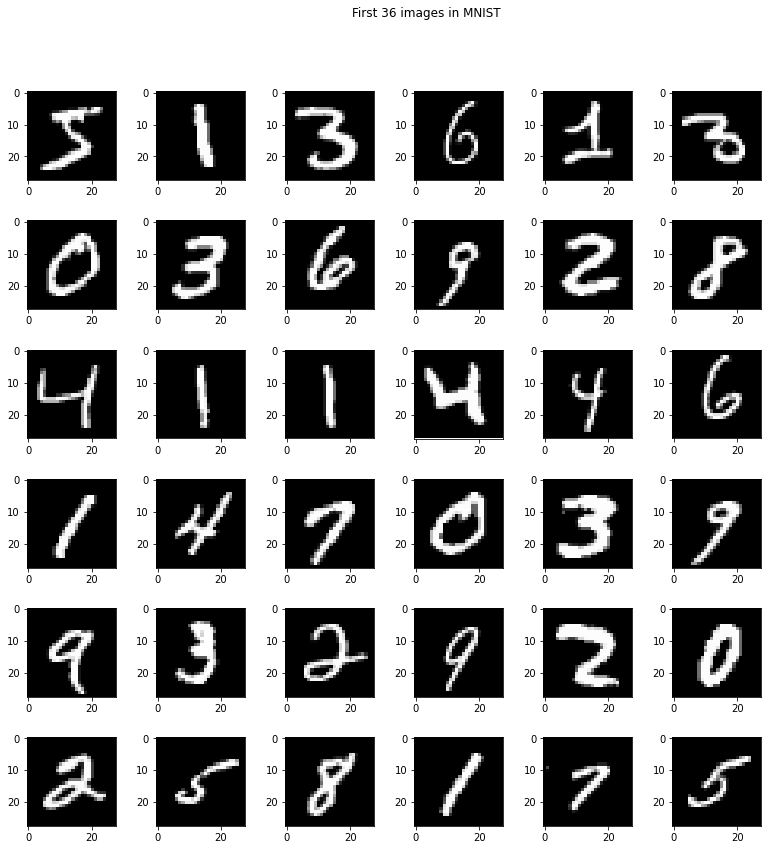

In [3]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')

### How these digits are actually represented in grayscale

<img src="https://github.com/patrickcgray/deep_learning_ecology/blob/master/mnist_digital.png?raw=1" alt="digital representation of a MINST digit" style="width: 750px;"/>

### build the model and take a look at the model summary

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### compile and train/fit the model

this is where the real work happens and the actual training of the NN

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4366 - accuracy: 0.8607 - val_loss: 0.1261 - val_accuracy: 0.9622
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1066 - accuracy: 0.9668 - val_loss: 0.0806 - val_accuracy: 0.9742
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.0809 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.0801 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0871 - val_accuracy: 0.9780
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0859 - val_accuracy: 0.9797
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0841 - val_accuracy: 0.9807

### evaluate the model on the testing dataset

In [6]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9819
Test loss: 0.10055332630872726
Test accuracy: 0.9818999767303467


### compare predictions to the input data

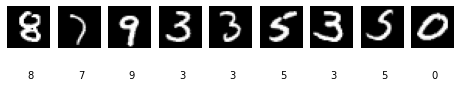

In [7]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 9
rows = 1
indices = np.random.randint(len(x_test), size=(10))
labels = np.argmax(model.predict(x_test[indices]), axis=1)
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[indices[i-1]].reshape((28, 28)), cmap = 'gray')
    plt.axis('off')
    plt.text(15,45, labels[i-1],  horizontalalignment='center', verticalalignment='center')
plt.show()